In [1]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv('titanic_train.csv')

In [3]:
#shape
df.shape

(891, 12)

dataset contain 891 rows and 12 column

In [4]:
#first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


we can see dataset contain null values that need to be treated

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna('S',inplace=True)

In [11]:
df.drop('Cabin',axis=1,inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

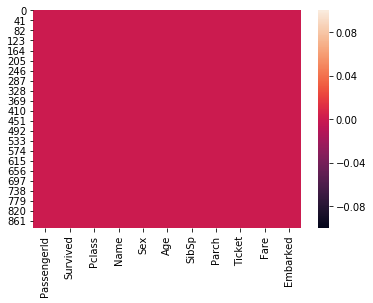

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


we can see dataset contain categorical values also which need to be treated

In [21]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2

In [24]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# EDA

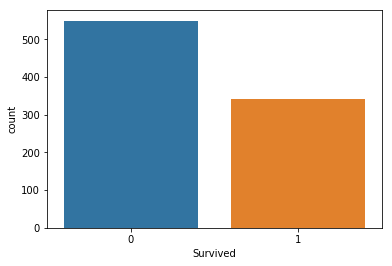

In [35]:
sns.countplot(x='Survived',data=df)

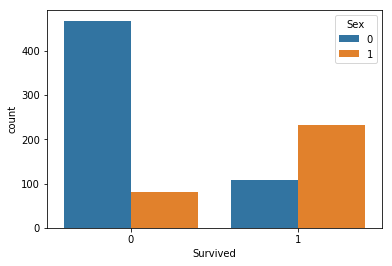

In [36]:
sns.countplot(x='Survived',hue='Sex',data=df)

we can see female survival is more compare to male

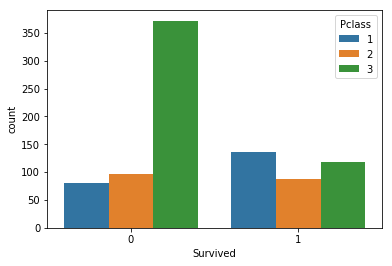

In [41]:
sns.countplot(x='Survived',hue='Pclass',data=df)

we can see 3rd pclass unsurvived is more as compare to 1st reserve seat

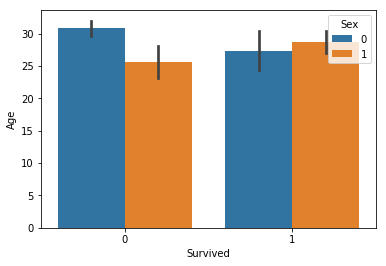

In [51]:
sns.barplot(x='Survived',y='Age',hue='Sex',data=df)

# Model Building

In [56]:
x=df.drop('Survived',axis=1)

In [57]:
y=df['Survived']

In [58]:
x.shape,y.shape

((891, 8), (891,))

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")



def f1_sco(x,y,model):
    model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]
    for m in model:
        maxf=0
        rs=0
        for r_state in range(42,100):
            x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
            m.fit(x_train,y_train)
            y_pred=m.predict(x_test)
            tmp=f1_score(y_test,y_pred)
            ("random state :",r_state," and f1 score: ",tmp)
            if tmp>maxf:
                maxf=tmp
                rs=r_state
        print(m)
        print("maximum f1_score is at random state :",rs," and it is :",maxf)
        
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = rs,test_size=0.20,stratify=y)
        m.fit(x_train,y_train)
        y_pred=m.predict(x_test)
        print("accuracy_score\n",accuracy_score(y_test,y_pred))
        print('\n')
        
        print("classification_report\n",classification_report(y_test,y_pred))
        print('\n')
        
        print("confusion_matrix\n",confusion_matrix(y_test,y_pred))
        print('\n')
        
        print('**********************************************************************************************************\n\n')
        
                
            

In [136]:
f1_sco(x,y,model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
maximum f1_score is at random state : 65  and it is : 0.7941176470588236
accuracy_score
 0.8435754189944135


classification_report
              precision    recall  f1-score   support

          0       0.87      0.88      0.87       110
          1       0.81      0.78      0.79        69

avg / total       0.84      0.84      0.84       179



confusion_matrix
 [[97 13]
 [15 54]]


**********************************************************************************************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_s

### Best result

#### hence we are getting best result in LogisticRegression 

maximum f1_score is at random state : 65  and it is : 0.7941176470588236

#### accuracy_score
 0.8435754189944135


#### classification_report
              precision    recall  f1-score   support

          0       0.87      0.88      0.87       110
          1       0.81      0.78      0.79        69

avg / total       0.84      0.84      0.84       179



#### confusion_matrix

 [[97 13]
 [15 54]]

In [137]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(LogisticRegression(), 'sonar_datset_svm.pkl')

['sonar_datset_svm.pkl']